# CPSL Ground Vehicle Dataset Generation  0911

In [7]:
import os
os.chdir("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import CPSL Radar Dataset Generator Code
from CPSL_Radar.datasets.Dataset_Generator import DatasetGenerator

#Wilkenson dataset folders
wilkenson_folder = "/data/david/CPSL_Ground/wilkenson_datasets/"

# scenario_folders = sorted(os.listdir(dataset_folder))
train_scenarios = ["lab_1","scene_2","4th_hallway_slow","1st_hallway_slow","4th_hallway_slow_1"]

test_scenarios = ["1st_hallway_slow_1","1st_hallway_fast","1st_hallway_fast_spin","4th_hallway_fast","4th_hallway_fast_spin"]

train_scenarios = [os.path.join(wilkenson_folder,scenario_folder) for
                   scenario_folder in train_scenarios]
test_scenarios = [os.path.join(wilkenson_folder,scenario_folder) for
                   scenario_folder in [test_scenarios[1], test_scenarios[3]]]

#box_dataset_folders
# box_folder = "/data/david/CPSL_Ground/box_datasets/"

# box_train_scenarios = ["08_21_23_10Hz_scene2","08_21_23_10Hz_scene3","08_21_23_10Hz_scene4_slow","08_21_23_10Hz_scene5_medium"]

# train_scenarios.extend(
#     [os.path.join(box_folder,scenario_folder) for
#      scenario_folder in box_train_scenarios]
# )

# box_test_scenarios = ["08_21_23_10Hz_scene6_faster"]


scenarios_to_use = train_scenarios

#location that we wish to save the dataset to
generated_dataset_path = "/data/david/CPSL_Ground/train/"

#specifying the names for the files
generated_file_name = "frame"
radar_data_folder = "radar"
lidar_data_folder = "lidar"

#basic dataset settings
num_chirps_to_save = 3
num_previous_frames = 0

In [12]:
#initialize the DatasetGenerator
dataset_generator = DatasetGenerator()

dataset_generator.config_generated_dataset_paths(
    generated_dataset_path=generated_dataset_path,
    generated_file_name=generated_file_name,
    generated_radar_data_folder=radar_data_folder,
    generated_lidar_data_folder=lidar_data_folder,
    clear_existing_data=True
)

dataset_generator.config_radar_lidar_data_paths(
    # choose which dataset to use
    scenario_folder= scenarios_to_use[1],
    radar_data_folder=radar_data_folder,
    lidar_data_folder=lidar_data_folder
)

DatasetGenerator._check_for_directory: found directory /data/david/CPSL_Ground/train/
DatasetGenerator._check_for_directory: found directory /data/david/CPSL_Ground/train/radar
DatasetGenerator._check_for_directory: clearing contents of /data/david/CPSL_Ground/train/radar
DatasetGenerator._check_for_directory: found directory /data/david/CPSL_Ground/train/lidar
DatasetGenerator._check_for_directory: clearing contents of /data/david/CPSL_Ground/train/lidar
DatasetGenerator.config_radar_lidar_data_paths: found 4089 samples


In [13]:
#configure the radar data processor
dataset_generator.config_radar_data_processor(
    max_range_bin=64,
    num_chirps_to_save=num_chirps_to_save,
    num_previous_frames=num_previous_frames,
    radar_fov= [-0.87, 0.87], #+/- 50 degrees
    num_angle_bins=64,
    power_range_dB=[60,105],
    chirps_per_frame= 64,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 64,
    adc_sample_rate_Hz = 2e6,
    chirp_slope_MHz_us= 35,
    start_freq_Hz=77e9,
    idle_time_us = 100,
    ramp_end_time_us = 100
)

#configure the lidar data processor
dataset_generator.config_lidar_data_processor(
    max_range_m=8.56,
    num_range_bins=64,
    angle_range_rad=[-np.pi/2 - 0.87,-np.pi/2 + 0.87], #[-np.pi /2 , np.pi /2],
    num_angle_bins=48,
    num_previous_frames=num_previous_frames
)

max range: 8.5654988m
num actual angle bins: 48


## Preview the generated dataset

In [14]:
#plot the radar and lidar data for visualization
dataset_generator.plot_radar_lidar_data(sample_idx=10)

save images at  /data/david/CPSL_Ground/train/frame_10.jpg


Xiao: get 50000 images as CycleGAN datasets



save images at  /data/david/CPSL_Ground/train/frame_2282.jpg
save images at  /data/david/CPSL_Ground/train/frame_2283.jpg
save images at  /data/david/CPSL_Ground/train/frame_2284.jpg
save images at  /data/david/CPSL_Ground/train/frame_2285.jpg
save images at  /data/david/CPSL_Ground/train/frame_2286.jpg
save images at  /data/david/CPSL_Ground/train/frame_2287.jpg
save images at  /data/david/CPSL_Ground/train/frame_2288.jpg
save images at  /data/david/CPSL_Ground/train/frame_2289.jpg
save images at  /data/david/CPSL_Ground/train/frame_2290.jpg
save images at  /data/david/CPSL_Ground/train/frame_2291.jpg
save images at  /data/david/CPSL_Ground/train/frame_2292.jpg
save images at  /data/david/CPSL_Ground/train/frame_2293.jpg
save images at  /data/david/CPSL_Ground/train/frame_2294.jpg
save images at  /data/david/CPSL_Ground/train/frame_2295.jpg
save images at  /data/david/CPSL_Ground/train/frame_2296.jpg
save images at  /data/david/CPSL_Ground/train/frame_2297.jpg
save images at  /data/da

IndexError: list index out of range

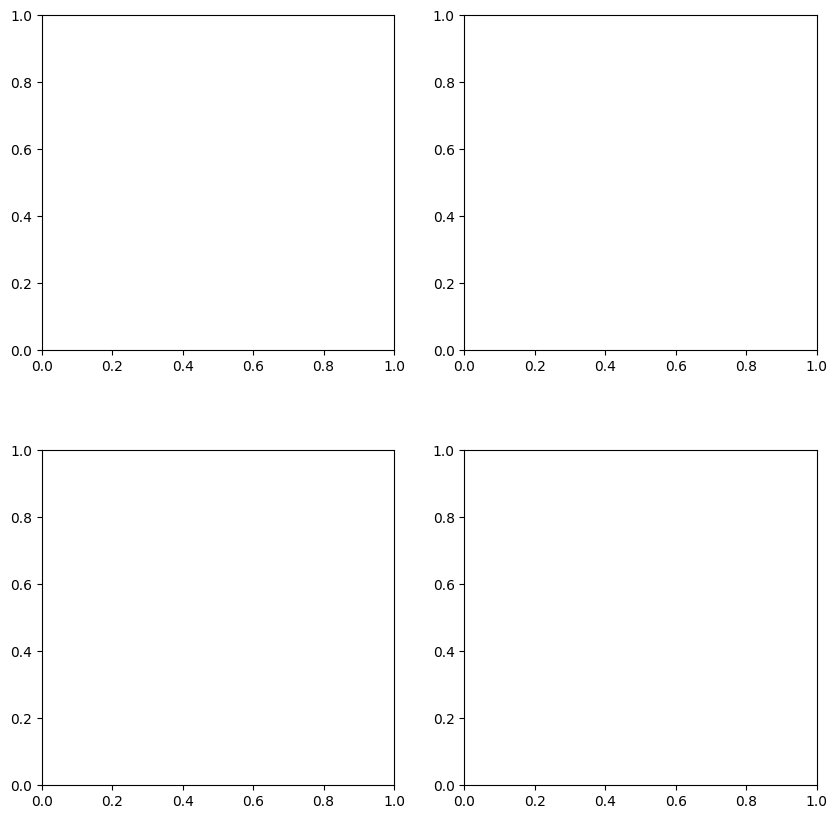

In [16]:
#plot the radar and lidar data for visualization

# frames = len()

for i in range (2282,50000):
    sample_idx = i
    
    dataset_generator.plot_radar_lidar_data(sample_idx=i)



## Use this code to generate a dataset for all of the scenarios

In [ ]:
#USE ONLY IF GENERTATING A SINGLE DATASET
# dataset_generator.generate_dataset(clear_contents=True)

#USE THIS ONE FOR NOW
dataset_generator.generate_dataset_from_multiple_scenarios(
    scenario_folders = scenarios_to_use,
    radar_data_folder= radar_data_folder,
    lidar_data_folder=lidar_data_folder
)

## View the generated dataset

In [ ]:
#view the generated data
dataset_generator.plot_saved_radar_lidar_data(sample_idx=1)


save the loaded saved npy file into jpeg type.

In [ ]:
dataset_generator.plot_saved_radar_lidar_data(sample_idx=1)